# Rhys

### Task 1 - EDA

In [121]:

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

# Import the data file
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

print(df.head())

   incident_id incident_date       state  city_or_county  \
0      2015849   May 26 2021    Illinois         Chicago   
1      2015730   May 26 2021  California        San Jose   
2      2014343   May 24 2021    Michigan         Inkster   
3      2014381   May 24 2021        Ohio  West Jefferson   
4      2012971   May 23 2021    Illinois         Chicago   

                         address  killed  injured  
0  7200 block of S Princeton Ave       0        4  
1              101 W Younger Ave      10        0  
2     27000 block of Rosewood St       2        2  
3                 127 Jackson St       4        0  
4                 3344 W Ohio St       0        4  


In [122]:
df.columns


Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'address',
       'killed', 'injured'],
      dtype='object')

In [123]:
df.nunique(axis=0)

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

In [124]:
a = len(df)
b = date(2014,1,1)
c = date(2021,5,26)
d = c-b
delta = d.days
# Size of our data, or number of columns
# Divided by the number days from the start to the end of our data
print("Average number of shootings per day:",round(a/delta,2))

Average number of shootings per day: 1.08


In [125]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,incident_id,killed,injured
count,2930.000000,2930.000000,2930.000000
mean,1099381.767918,1.072696,4.188055
std,587470.802438,2.156834,8.395836
min,92194.000000,0.000000,0.000000
25%,575898.750000,0.000000,3.000000
50%,1143329.500000,1.000000,4.000000
75%,1678961.750000,1.000000,5.000000
max,2015849.000000,59.000000,441.000000


#### Below is a graph showing the frequecy of people injured per incident analyzed

<AxesSubplot:title={'center':'Frequency of injured per incident'}, ylabel='Frequency'>

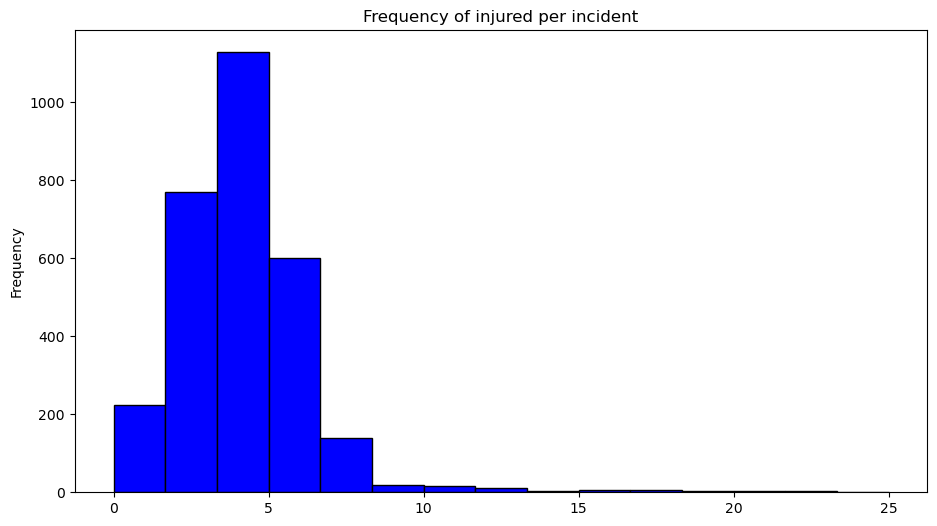

In [126]:
# The below code just filters out most extreme instances
df = df[df['killed'] < 35]
df = df[df['injured'] < 35]
df['injured'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='blue',edgecolor='black',title = "Frequency of injured per incident")

#### The graph below shows the frequency of how many people were killed per incident analzyed.

<AxesSubplot:title={'center':'Frequency of killed per incident'}, ylabel='Frequency'>

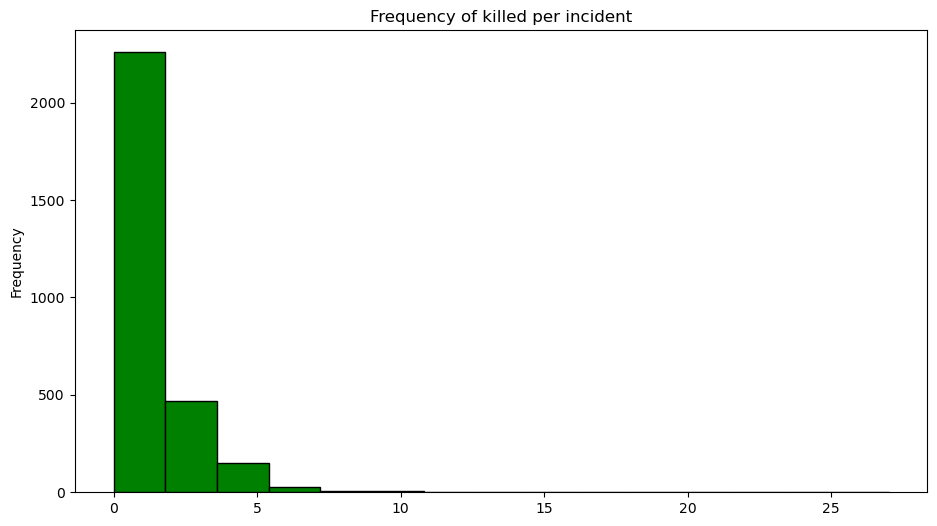

In [127]:

df['killed'].plot(kind='hist', bins=15, figsize=(11,6), facecolor='green',edgecolor='black',title = "Frequency of killed per incident")

#### Below we can see the number of shootings that occured in each state

<AxesSubplot:title={'center':'Number of shootings in each state'}>

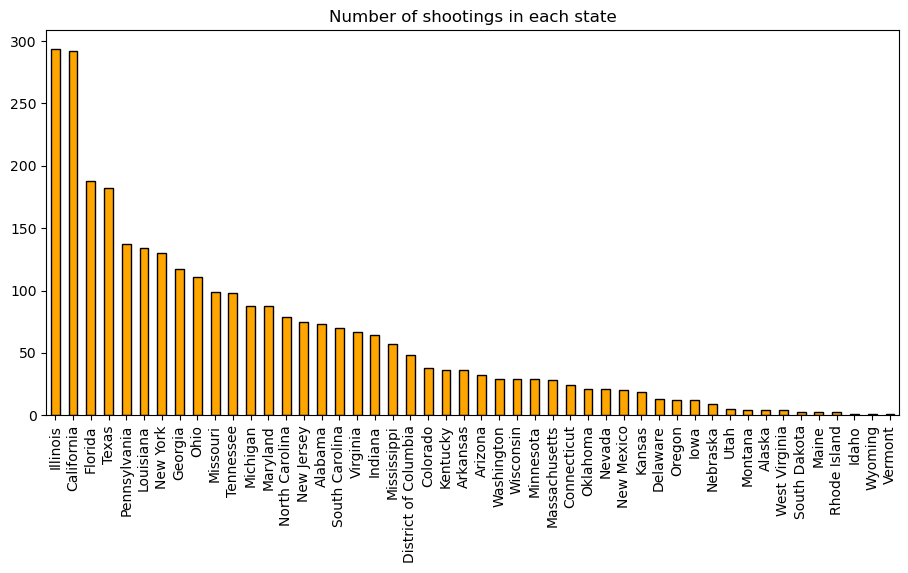

In [130]:
df['state'].value_counts().plot(kind='bar',title = 'Number of shootings in each state', figsize=(11,5), facecolor = 'orange', edgecolor = 'black')


### Task 2 - Analysis Pipeline

##### Load Data - Already done

##### Clean Data - Below we clean and filter our data

In [76]:
# Filter out the uneeded columns
df_cleaned = df.copy().drop(['incident_id','address'], axis=1)
df_cleaned = df_cleaned.dropna(axis=0)

# Renames our columns to look more freindly and useable
df_cleaned = df_cleaned.rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})

# Filters out any extreme casualties or injuries in shootings
df_cleaned = df_cleaned[df_cleaned['Killed'] < 15]
df_cleaned = df_cleaned[df_cleaned['Injured'] < 20]

print(df_cleaned.head())

  incident_date       State     City/County  Killed  Injured
0   May 26 2021    Illinois         Chicago       0        4
1   May 26 2021  California        San Jose      10        0
2   May 24 2021    Michigan         Inkster       2        2
3   May 24 2021        Ohio  West Jefferson       4        0
4   May 23 2021    Illinois         Chicago       0        4


##### Process Data - Below I created a total row and changed the dates into years and months

In [77]:
def clean_month(row):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]

def clean_year(row):
    years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])

# Creates a total row, combining killed and injured 
df_cleaned['Total'] = df_cleaned['Killed'] + df_cleaned['Injured']

df_cleaned['Month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
df_cleaned['Year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
   
# Filters out what is not a full year and deaths more than 15 and injured more than 20

df_cleaned = df_cleaned[df_cleaned['Year'] < 2021]
# Rearrange the new rows in my dataframe
df_cleaned = df_cleaned[['Year', 'Month', 'State','City/County', 'Killed', 'Injured', 'Total']]

##### Wrangle Data - We did not need to wrangle or restructure our data very much

##### Below is a graph showing the number of shooting incidents seperated by the years in our data set.

<AxesSubplot:title={'center':'Number of Incidents per Year'}, xlabel='Year'>

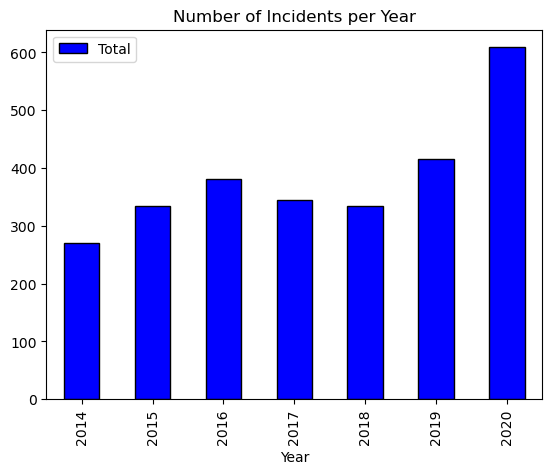

In [68]:
df_year = df_cleaned.groupby('Year').count()
df_year = df_year.drop('Month', axis=1)
df_year = df_year.drop('State', axis=1)
df_year = df_year.drop('City/County', axis=1)
df_year = df_year.drop('Killed', axis=1)
df_year = df_year.drop('Injured', axis=1)

df_year.plot(kind = 'bar', title = 'Number of Incidents per Year', facecolor = 'blue', edgecolor = 'black')

#### Below is a graph showing the number of incidents that occured seperated into months.

<AxesSubplot:title={'center':'Number of Incidents per Month'}, xlabel='Month'>

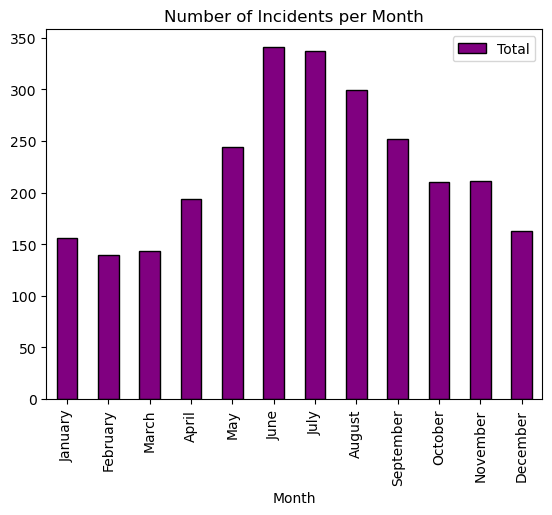

In [69]:
df_month = df_cleaned.groupby('Month').count()
df_month = df_month.drop('Year', axis=1)
df_month = df_month.drop('State', axis=1)
df_month = df_month.drop('City/County', axis=1)
df_month = df_month.drop('Killed', axis=1)
df_month = df_month.drop('Injured', axis=1)
df_month = df_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
df_month.plot(kind = 'bar', title = 'Number of Incidents per Month', facecolor = 'purple', edgecolor = 'black')

##### Below is the code to output the average number of shootings that occured each day.

In [79]:
df_total = df_cleaned.copy()
df_total = df_total.drop('Year', axis=1)
df_total = df_total.drop('Killed', axis=1)
df_total = df_total.drop('Injured', axis=1)
df_total.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Total
count,2689.000000
mean,4.971365
std,1.872697
min,4.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,27.000000


#### Above is a standard, mean, max and min of our dataset after it was filtered to remove injured and killed outliers. As you can see on average 1 person was killed and 4 were injured per incident.

#### Below is a scatter plot of how many were killed per incident each state

<AxesSubplot:title={'center':'Number killed in each State'}, xlabel='State', ylabel='Killed'>

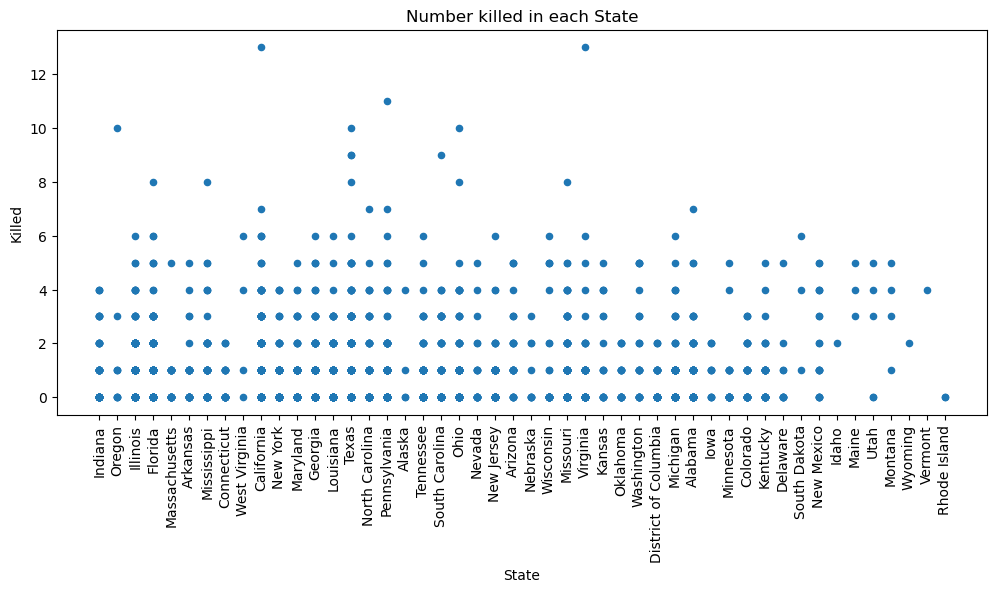

In [84]:
df_cleaned.plot(kind = 'scatter',figsize=(12,5), x = 'State', y = 'Killed', rot = 90, title = "Number killed in each State")

### Below is a scatter plot of the number of people injured per incident seperated by state.

<AxesSubplot:title={'center':'Number injured in each state'}, xlabel='State', ylabel='Injured'>

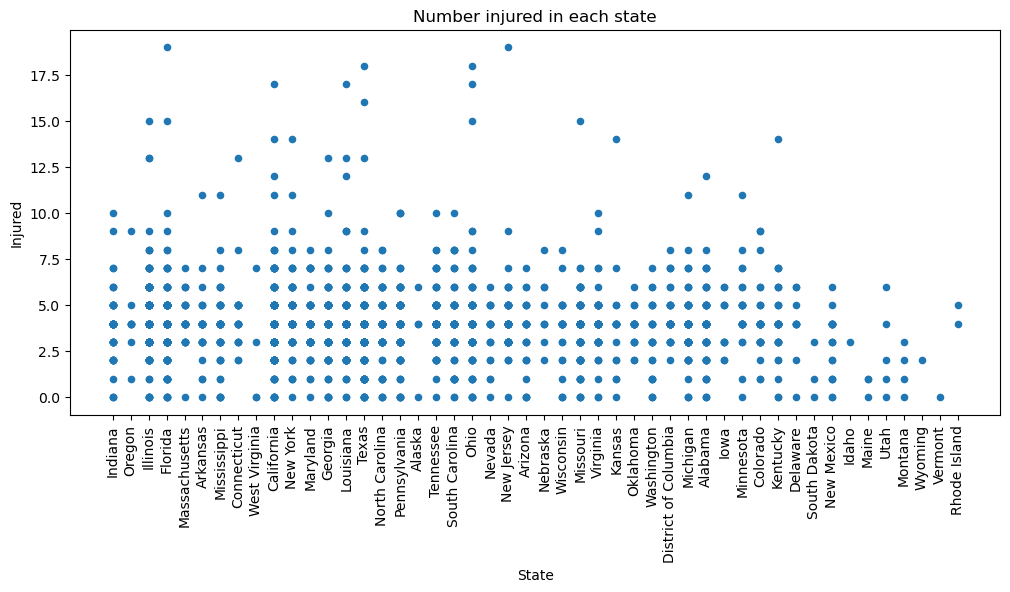

In [85]:
df_cleaned.plot(kind = 'scatter',figsize=(12,5), x = 'State', y = 'Injured', rot = 90, title = 'Number injured in each state')

### Task 3

#### Task 3.1
##### Our data is now being cleaned through chains but not within a method

In [16]:
df = (
         pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
        .drop(['incident_id','address'], axis=1)
        .dropna(axis = 0)
        .rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})     
    ) 
df1 = (
        df
        .assign(Total= df.Killed+ df.Injured)
        [(df.Killed < 15) & (df.Injured < 20)]
        .assign(Month=lambda x : x.incident_date.str.split().str[0])
        .assign(Year=lambda x : x.incident_date.str.split().str[2])
        
    )  
df2 = (
        df1
        .drop(['incident_date'], axis=1)
        .astype({'Year': 'int64'})
        .loc[lambda x: x['Year'] < 2021]
        [['Year','Month','State','City/County','Killed','Injured','Total']]
    )
df = df2
print(df.head())

     Year     Month          State   City/County  Killed  Injured  Total
232  2020  December        Indiana  Indianapolis       1        3      4
233  2020  December         Oregon  Happy Valley       0        4      4
234  2020  December       Illinois      Rockford       3        3      6
235  2020  December        Florida         Tampa       2        2      4
236  2020  December  Massachusetts          Lynn       1        5      6


#### Task 3.2
##### Our data is now being cleaned with a method chain within the same file

In [18]:
def load_and_process(csvPath):
    df = (
         pd.read_csv(csvPath)
        .drop(['incident_id','address'], axis=1)
        .dropna(axis = 0)
        .rename(columns={"city_or_county":"City/County","state":"State","killed":"Killed","injured":"Injured"})     
    ) 
    df1 = (
        df
        .assign(Total= df.Killed+ df.Injured)
        [(df.Killed < 15) & (df.Injured < 20)]
        .assign(Month=lambda x : x.incident_date.str.split().str[0])
        .assign(Year=lambda x : x.incident_date.str.split().str[2])
        
    )  
    df2 = (
        df1
        .drop(['incident_date'], axis=1)
        .astype({'Year': 'int64'})
        .loc[lambda x: x['Year'] < 2021]
        [['Year','Month','State','City/County','Killed','Injured','Total']]
    )
    return df2
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
print(df.head())

     Year     Month          State   City/County  Killed  Injured  Total
232  2020  December        Indiana  Indianapolis       1        3      4
233  2020  December         Oregon  Happy Valley       0        4      4
234  2020  December       Illinois      Rockford       3        3      6
235  2020  December        Florida         Tampa       2        2      4
236  2020  December  Massachusetts          Lynn       1        5      6


#### Task 3.3
##### Read our method chain from a seperate file

In [15]:
from project_functions1 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
print(df.head())

,Year,Month,State,City/County,Killed,Injured,Total
232,2020,December,Indiana,Indianapolis,1,3,4
233,2020,December,Oregon,Happy Valley,0,4,4
234,2020,December,Illinois,Rockford,3,3,6
235,2020,December,Florida,Tampa,2,2,4
236,2020,December,Massachusetts,Lynn,1,5,6
...,...,...,...,...,...,...,...
2925,2014,January,Alabama,Huntsville,0,5,5
2926,2014,January,Mississippi,Jackson,0,4,4
2927,2014,January,Pennsylvania,Erie,1,3,4
2928,2014,January,New York,Queens,1,3,4


### Task 4 can be found in Formal_Analysis1.md

## Research question/interests

I wonder what is required for it to be considered a mass shooting? Most of the shootings we hear about through the media or the news generally have multiple casualties as well as many injured and are usually classified as mass shootings but currently there is not a set definition.
I find it quite interesting how often shootings occur in the US. 
With what feels like on average one occuring each day from when our data began. Which in my opinion is far too often than it should be for preventable incidents. 
 #####
I wonder why nothing is being done about gun violence desipte it increasing in recent years?
I also find it quite interesting that the frequency of shootings has also gone up since 2014. This is quite concerning as an increase in shootings leads to more death and injuries across the US.
 #####
Since we started this project, I have also been wondering that as shootings have been increasing over the recent years, which months of the year are the mostl deadly or the most shootings occur. 